In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('pokemon.csv', sep=',')
data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Has Gender,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,True,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,True,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,True,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,True,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,False,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,False,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,False,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,False,True


In [3]:
stat = pd.read_csv('battles.csv', sep=',')
stat

,First_pokemon,Second_pokemon,Winner
0,173,463,463
1,174,307,307
2,772,181,772
3,430,356,430
4,519,695,519
...,...,...,...
39995,416,778,778
39996,221,265,265
39997,35,448,448
39998,791,713,713


In [4]:
stat1 = stat.melt(var_name='columns', value_name='#')
org = pd.crosstab(index=stat1['#'], columns=stat1['columns'])
addition = org.First_pokemon + org.Second_pokemon
rate = org.Winner / addition

In [5]:
ratedata = rate.to_frame()
df_outer = pd.merge(data, ratedata, on='#', how='outer')
pokemon = df_outer.rename(columns={0: 'Win Rate'})
winrate = pokemon['Win Rate']

In [6]:
df = pd.DataFrame(data=winrate)
a = df['Win Rate'].isnull().sum()
b = winrate.sum()/(winrate.size-a)
pokemon = pokemon.replace({'Win Rate': np.NaN}, b)

In [7]:
for i in range(1,winrate.size):
    if df['Win Rate'][i] != 'nan':
        b = a + df['Win Rate'][i]

In [8]:
winrate[781]
winrate
df = pd.DataFrame(data=winrate)

In [9]:
x_HP = pokemon[['HP']]
x_Attack = pokemon[['Attack']]
x_Defense = pokemon[['Defense']]
x_SpAtk = pokemon[['Sp. Atk']]
x_SpDef = pokemon[['Sp. Def']]
x_Speed = pokemon[['Speed']]
y_Rate = pokemon[['Win Rate']]

In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
regr = linear_model.LinearRegression()

In [11]:
x_HP_train, x_HP_test, y_HP_train, y_HP_test = train_test_split(x_HP,y_Rate,test_size=0.2, random_state=4211)
x_Attack_train, x_Attack_test, y_Attack_train, y_Attack_test = train_test_split(x_Attack,y_Rate,test_size=0.2, random_state=4211)
x_Defense_train, x_Defense_test, y_Defense_train, y_Defense_test = train_test_split(x_Defense,y_Rate,test_size=0.2, random_state=4211)
x_SpAtk_train, x_SpAtk_test, y_SpAtk_train, y_SpAtk_test = train_test_split(x_SpAtk,y_Rate,test_size=0.2, random_state=4211)
x_SpDef_train, x_SpDef_test, y_SpDef_train, y_SpDef_test = train_test_split(x_SpDef,y_Rate,test_size=0.2, random_state=4211)
x_Speed_train, x_Speed_test, y_Speed_train, y_Speed_test = train_test_split(x_Speed,y_Rate,test_size=0.2, random_state=4211)

Mean squared error: 5380.36
Variance score: 0.11


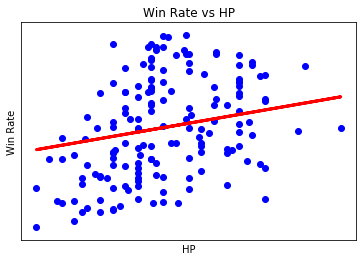

In [12]:
regr.fit(x_HP_train, y_HP_train)
y_HP_pred = regr.predict(x_HP_test)

print("Mean squared error: %.2f"
      % mean_squared_error(x_HP_test, y_HP_pred))
print('Variance score: %.2f' % r2_score(y_HP_test, y_HP_pred))

plt.scatter(x_HP_test, y_HP_test,  color='blue')
plt.plot(x_HP_test, y_HP_pred, color='red', linewidth=3)
plt.axis

plt.xticks(())
plt.yticks(())
plt.title('Win Rate vs HP')
plt.xlabel('HP')
plt.ylabel('Win Rate')
plt.show()

Mean squared error: 7985.36
Variance score: 0.22


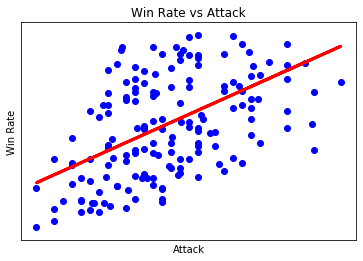

In [13]:
regr.fit(x_Attack_train, y_Attack_train)
y_Attach_pred = regr.predict(x_Attack_test)

print("Mean squared error: %.2f"
      % mean_squared_error(x_Attack_test, y_Attach_pred))
print('Variance score: %.2f' % r2_score(y_Attack_test, y_Attach_pred))

plt.scatter(x_Attack_test, y_Attack_test,  color='blue')
plt.plot(x_Attack_test, y_Attach_pred, color='red', linewidth=3)
plt.axis

plt.xticks(())
plt.yticks(())
plt.title('Win Rate vs Attack')
plt.xlabel('Attack')
plt.ylabel('Win Rate')
plt.show()

Mean squared error: 6889.83
Variance score: -0.01


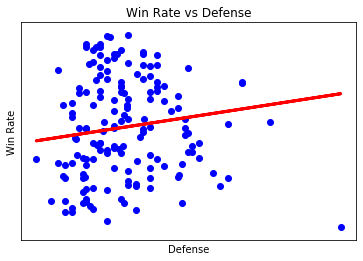

In [14]:
regr.fit(x_Defense_train, y_Defense_train)
y_Defense_pred = regr.predict(x_Defense_test)

print("Mean squared error: %.2f"
      % mean_squared_error(x_Defense_test, y_Defense_pred))
print('Variance score: %.2f' % r2_score(y_Defense_test, y_Defense_pred))

plt.scatter(x_Defense_test, y_Defense_test,  color='blue')
plt.plot(x_Defense_test, y_Defense_pred, color='red', linewidth=3)
plt.axis

plt.xticks(())
plt.yticks(())
plt.title('Win Rate vs Defense')
plt.xlabel('Defense')
plt.ylabel('Win Rate')
plt.show()

Mean squared error: 6556.23
Variance score: 0.24


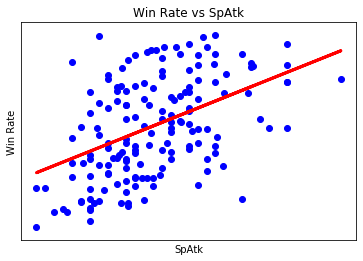

In [15]:
regr.fit(x_SpAtk_train, y_SpAtk_train)
y_SpAtk_pred = regr.predict(x_SpAtk_test)

print("Mean squared error: %.2f"
      % mean_squared_error(x_SpAtk_test, y_SpAtk_pred))
print('Variance score: %.2f' % r2_score(y_SpAtk_test, y_SpAtk_pred))

plt.scatter(x_SpAtk_test, y_SpAtk_test,  color='blue')
plt.plot(x_SpAtk_test, y_SpAtk_pred, color='red', linewidth=3)
plt.axis

plt.xticks(())
plt.yticks(())
plt.title('Win Rate vs SpAtk')
plt.xlabel('SpAtk')
plt.ylabel('Win Rate')
plt.show()

Mean squared error: 6562.93
Variance score: -0.00


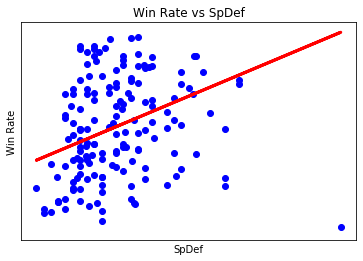

In [16]:
regr.fit(x_SpDef_train, y_SpDef_train)
y_SpDef_pred = regr.predict(x_SpDef_test)

print("Mean squared error: %.2f"
      % mean_squared_error(x_SpDef_test, y_SpDef_pred))
print('Variance score: %.2f' % r2_score(y_SpDef_test, y_SpDef_pred))

plt.scatter(x_SpDef_test, y_SpDef_test,  color='blue')
plt.plot(x_SpDef_test, y_SpDef_pred, color='red', linewidth=3)
plt.axis

plt.xticks(())
plt.yticks(())
plt.title('Win Rate vs SpDef')
plt.xlabel('SpDef')
plt.ylabel('Win Rate')
plt.show()

Mean squared error: 5321.44
Variance score: 0.87


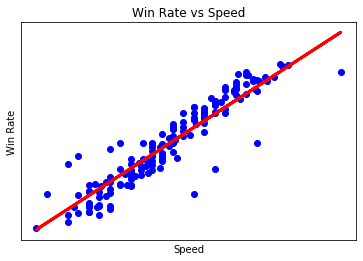

In [17]:
regr.fit(x_Speed_train, y_Speed_train)
y_Speed_pred = regr.predict(x_Speed_test)

print("Mean squared error: %.2f"
      % mean_squared_error(x_Speed_test, y_Speed_pred))
print('Variance score: %.2f' % r2_score(y_Speed_test, y_Speed_pred))

plt.scatter(x_Speed_test, y_Speed_test,  color='blue')
plt.plot(x_Speed_test, y_Speed_pred, color='red', linewidth=3)
plt.axis

plt.xticks(())
plt.yticks(())
plt.title('Win Rate vs Speed')
plt.xlabel('Speed')
plt.ylabel('Win Rate')
plt.show()

In [18]:
pokemonT3 = pokemon
pokemonT3['Has Gender'] = pokemonT3['Has Gender'] * 1
pokemonT3['Legendary'] = pokemonT3['Legendary'] * 1
category1 = pd.get_dummies(pokemonT3['Type 1'], prefix = 'prop1')
category2 = pd.get_dummies(pokemonT3['Type 2'], prefix = 'prop2')
pokemonT3 = pd.concat([category1, category2, pokemonT3], axis=1)
pokemonT3

,prop1_Bug,prop1_Dark,prop1_Dragon,prop1_Electric,prop1_Fairy,prop1_Fighting,prop1_Fire,prop1_Flying,prop1_Ghost,prop1_Grass,...,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Has Gender,Legendary,Win Rate
0,0,0,0,0,0,0,0,0,0,1,...,45,49,49,65,65,45,1,1,0,0.254902
1,0,0,0,0,0,0,0,0,0,1,...,60,62,63,80,80,60,1,1,0,0.395833
2,0,0,0,0,0,0,0,0,0,1,...,80,82,83,100,100,80,1,1,0,0.631068
3,0,0,0,0,0,0,0,0,0,1,...,80,100,123,122,120,80,1,1,0,0.578947
4,0,0,0,0,0,0,1,0,0,0,...,39,52,43,60,50,65,1,1,0,0.445652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,50,100,150,100,150,50,6,0,1,0.386364
796,0,0,0,0,0,0,0,0,0,0,...,50,160,110,160,110,110,6,0,1,0.911765
797,0,0,0,0,0,0,0,0,0,0,...,80,110,60,150,130,70,6,0,1,0.528090
798,0,0,0,0,0,0,0,0,0,0,...,80,160,60,170,130,80,6,0,1,0.617886


In [19]:
pokemonT3.drop(['Type 1'], axis=1, inplace=True)
pokemonT3.drop(['Type 2'], axis=1, inplace=True)
pokemonT3.drop(['Win Rate'], axis=1, inplace=True)
pokemonT3.drop(['#'], axis=1, inplace=True)
pokemonT3.drop(['Name'], axis=1, inplace=True)
y_legendary = pokemonT3['Legendary']
pokemonT3.drop(['Legendary'], axis=1, inplace=True)

In [20]:
pokemonT3.index = np.arange(1, len(pokemonT3) + 1)

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.special
import time
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

In [22]:
x = pokemonT3
y = y_legendary

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4211)
x_train

,prop1_Bug,prop1_Dark,prop1_Dragon,prop1_Electric,prop1_Fairy,prop1_Fighting,prop1_Fire,prop1_Flying,prop1_Ghost,prop1_Grass,...,prop2_Steel,prop2_Water,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Has Gender
761,0,0,0,0,0,0,0,0,0,0,...,0,1,50,60,60,60,60,30,6,1
342,0,0,0,1,0,0,0,0,0,0,...,0,0,60,40,50,75,85,95,3,1
618,0,0,0,0,0,0,0,0,0,1,...,0,0,75,86,67,106,67,60,5,1
656,0,0,0,0,0,0,0,0,0,0,...,0,0,165,75,80,40,45,65,5,1
149,0,0,0,0,0,0,0,0,0,0,...,0,0,65,60,70,85,75,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0,0,0,0,0,0,0,0,0,0,...,0,0,50,50,40,30,30,50,2,1
504,0,0,0,0,0,0,0,0,0,0,...,0,0,48,61,40,61,40,50,4,1
81,0,0,0,0,0,0,0,0,0,0,...,0,0,40,80,100,30,30,20,1,1
317,1,0,0,0,0,0,0,0,0,0,...,0,0,1,90,45,30,30,40,3,0


In [24]:
print('full', len(x))
print('train', len(x_train))
print('test', len(x_test))

full 800
train 640
test 160


In [25]:
Time = np.zeros(shape=(8,3))
Accu = np.zeros(shape=(8,3))
F1sc = np.zeros(shape=(8,3))
j = 8
for x in range(0,8): 
    for y in range(0,3):
        model = SGDClassifier(loss='log', learning_rate='invscaling', eta0=0.7, random_state=j*100)
        start_time = time.time()
        model.fit(x_train, y_train)
        end_time = time.time()
        time_diff = end_time - start_time
        y_predict = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_predict)
        f1 = f1_score(y_test, y_predict)
        
        Time[x][y] = time_diff
        Accu[x][y] = accuracy
        F1sc[x][y] = f1
        
        j += 1
        
    meanTime = Time[x].mean()
    meanAccu = Accu[x].mean()
    meanF1sc = F1sc[x].mean()
    stdTime = Time[x].std()
    stdAccu = Accu[x].std()
    stdF1sc = F1sc[x].std()
    print(meanTime)
    print(meanAccu)
    print(meanF1sc)
    print(stdTime)
    print(stdAccu)
    print(stdF1sc)
    print('\n')

0.008311192194620768
0.8958333333333334
0.12599681020733652
0.0020497954048342977
0.0029462782549439376
0.11230154221552754


0.008638620376586914
0.8916666666666666
0.1817543859649123
0.0016970382686596998
0.0077951195557790665
0.05649885532033781


0.007978439331054688
0.8958333333333334
0.17786561264822134
0.0024434721669685405
0.0029462782549439376
0.12586310931296962


0.0076452891031901045
0.6833333333333332
0.11014290693621472
0.0016952794416585355
0.2931657902204068
0.09198819360336426


0.007978041966756185
0.8854166666666666
0.1426146010186757
0.0008143933902843604
0.011785113019775802
0.13431534011608454


0.00764616330464681
0.8979166666666667
0.09523809523809523
0.0016949833087219934
0.005892556509887875
0.13468700594029476


0.008975664774576822
0.8958333333333334
0.06666666666666667
0.0014106831477798496
0.0029462782549439376
0.09428090415820635


0.008309682210286459
0.8937500000000002
0.03508771929824561
0.0004694597369742229
1.1102230246251565e-16
0.049621528504319126

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
x = pokemonT3
y = y_legendary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4211)
x_train

,prop1_Bug,prop1_Dark,prop1_Dragon,prop1_Electric,prop1_Fairy,prop1_Fighting,prop1_Fire,prop1_Flying,prop1_Ghost,prop1_Grass,...,prop2_Steel,prop2_Water,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Has Gender
761,0,0,0,0,0,0,0,0,0,0,...,0,1,50,60,60,60,60,30,6,1
342,0,0,0,1,0,0,0,0,0,0,...,0,0,60,40,50,75,85,95,3,1
618,0,0,0,0,0,0,0,0,0,1,...,0,0,75,86,67,106,67,60,5,1
656,0,0,0,0,0,0,0,0,0,0,...,0,0,165,75,80,40,45,65,5,1
149,0,0,0,0,0,0,0,0,0,0,...,0,0,65,60,70,85,75,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0,0,0,0,0,0,0,0,0,0,...,0,0,50,50,40,30,30,50,2,1
504,0,0,0,0,0,0,0,0,0,0,...,0,0,48,61,40,61,40,50,4,1
81,0,0,0,0,0,0,0,0,0,0,...,0,0,40,80,100,30,30,20,1,1
317,1,0,0,0,0,0,0,0,0,0,...,0,0,1,90,45,30,30,40,3,0


C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


meanTi: 0.7802441120147705
meanAc: 0.8937500000000002
meanF1: 0.0
stadTi: 0.021236082316013007
stdAc: 1.1102230246251565e-16
stdF1: 0.0




C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


meanTi: 0.6672163804372152
meanAc: 0.8937500000000002
meanF1: 0.0
stadTi: 0.03016279411624831
stdAc: 1.1102230246251565e-16
stdF1: 0.0




C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


meanTi: 0.741354783376058
meanAc: 0.9020833333333332
meanF1: 0.1913875598086124
stadTi: 0.10465008644089133
stdAc: 0.010622957319984982
stdF1: 0.14906949212820314




C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


meanTi: 0.8673473199208578
meanAc: 0.9208333333333334
meanF1: 0.504927536231884
stadTi: 0.03312187521299184
stdAc: 0.00294627825494399
stdF1: 0.06971481499316771




C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


meanTi: 0.8327736854553223
meanAc: 0.9291666666666667
meanF1: 0.5839145954088484
stadTi: 0.15683385318631982
stdAc: 0.0029462782549439376
stdF1: 0.03412571387087403


meanTi: 0.7177474498748779
meanAc: 0.9333333333333332
meanF1: 0.6086274509803923
stadTi: 0.10559268521242345
stdAc: 0.0029462782549439376
stdF1: 0.06876960068010345


meanTi: 1.0023207664489746
meanAc: 0.9395833333333333
meanF1: 0.6860632183908048
stadTi: 0.09509062553311953
stdAc: 0.007795119555779017
stdF1: 0.052800502370726886




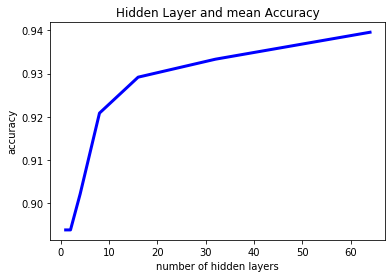

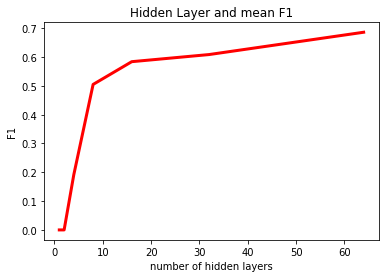

In [28]:
Hidden_Unit = [1, 2, 4, 8, 16, 32, 64]
Time = np.zeros(shape=(7,3))
Accu = np.zeros(shape=(7,3))
F1sc = np.zeros(shape=(7,3))
meanAc = []
meanF1 = []
j = 2
for x in range(0,7):
    for y in range(0,3):
        model = MLPClassifier(hidden_layer_sizes=(Hidden_Unit[x],), max_iter=500, random_state=y*50)
        start_time = time.time()
        model.fit(x_train, y_train)
        end_time = time.time()
        time_diff = end_time - start_time
        y_predict = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_predict)
        f1 = f1_score(y_test, y_predict)
        
        Time[x][y] = time_diff
        Accu[x][y] = accuracy
        F1sc[x][y] = f1

        j += 1
    
    meanTime = Time[x].mean()
    meanAccu = Accu[x].mean()
    meanF1sc = F1sc[x].mean()
    stdTime = Time[x].std()
    stdAccu = Accu[x].std()
    stdF1sc = F1sc[x].std()
    meanAc.append(meanAccu)
    meanF1.append(meanF1sc)
    
    
    print('meanTi:', meanTime)
    print('meanAc:', meanAccu)
    print('meanF1:', meanF1sc)
    print('stadTi:', stdTime)
    print('stdAc:', stdAccu)
    print('stdF1:', stdF1sc)
    print('\n')
    
plt.plot(Hidden_Unit, meanAc,  color='blue', linewidth=3)
plt.axis
plt.title('Hidden Layer and mean Accuracy')
plt.xlabel('number of hidden layers')
plt.ylabel('accuracy')
plt.show()
plt.plot(Hidden_Unit, meanF1,  color='red', linewidth=3)
plt.axis
plt.title('Hidden Layer and mean F1')
plt.xlabel('number of hidden layers')
plt.ylabel('F1')
plt.show()

In [29]:
poke = pd.read_csv('pokemon.csv', sep=',')
batl = pd.read_csv('battles.csv', sep=',')
q4q4 = pd.read_csv('q4_test.csv', sep=',')

In [30]:
y_legendary.index = np.arange(1, len(y_legendary) + 1)
pokemon = pd.concat([pokemonT3, y_legendary],axis='columns')
pokemon

,prop1_Bug,prop1_Dark,prop1_Dragon,prop1_Electric,prop1_Fairy,prop1_Fighting,prop1_Fire,prop1_Flying,prop1_Ghost,prop1_Grass,...,prop2_Water,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Has Gender,Legendary
1,0,0,0,0,0,0,0,0,0,1,...,0,45,49,49,65,65,45,1,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,60,62,63,80,80,60,1,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,80,82,83,100,100,80,1,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,80,100,123,122,120,80,1,1,0
5,0,0,0,0,0,0,1,0,0,0,...,0,39,52,43,60,50,65,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,0,0,0,0,0,0,0,0,0,...,0,50,100,150,100,150,50,6,0,1
797,0,0,0,0,0,0,0,0,0,0,...,0,50,160,110,160,110,110,6,0,1
798,0,0,0,0,0,0,0,0,0,0,...,0,80,110,60,150,130,70,6,0,1
799,0,0,0,0,0,0,0,0,0,0,...,0,80,160,60,170,130,80,6,0,1


In [31]:
Fir = batl['First_pokemon']
Sec = batl['Second_pokemon']

In [32]:
ONE = pd.DataFrame()
TWO = pd.DataFrame()
for i in range (0,40000):
    ONE = ONE.append(pokemon.loc[[Fir[i]]], ignore_index=True)
for j in range (0,40000):
    TWO = TWO.append(pokemon.loc[[Sec[j]]], ignore_index=True)
New_Data = pd.concat([ONE, TWO],axis='columns')
New_Data

,prop1_Bug,prop1_Dark,prop1_Dragon,prop1_Electric,prop1_Fairy,prop1_Fighting,prop1_Fire,prop1_Flying,prop1_Ghost,prop1_Grass,...,prop2_Water,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Has Gender,Legendary
0,0,0,0,0,0,0,0,0,0,0,...,0,30,30,42,30,42,70,4,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,68,85,65,165,135,100,3,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,55,35,50,55,110,85,2,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,70,85,140,85,70,20,3,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,52,65,50,45,50,38,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,0,0,...,0,57,80,91,80,87,75,6,1,0
39996,1,0,0,0,0,0,0,0,0,0,...,0,100,75,115,90,115,85,2,0,1
39997,0,0,0,0,0,0,0,0,0,0,...,0,77,85,51,55,51,65,4,1,0
39998,0,0,0,0,0,0,0,1,0,0,...,0,125,120,90,170,100,95,5,0,1


In [33]:
Win = batl['Winner']
Winner = pd.DataFrame()
for k in range(0,40000):
    if (Win[k] == Fir[k]):
        Winner = Winner.append(dict(winner=1), ignore_index=True)
    else:
        Winner = Winner.append(dict(winner=0), ignore_index=True)


In [34]:
Winner = Winner.astype(int)

In [35]:
Winner.values

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [36]:
x = New_Data
y = Winner.values
z = y.flatten()
z

array([0, 0, 1, ..., 0, 0, 0])

In [37]:
import numpy as np
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [38]:
mlp = MLPClassifier(random_state=4211)
clf = GridSearchCV(mlp, {'solver':['sgd','adam'], 'learning_rate':['constant','invscaling','adaptive'], 
                         'shuffle':[True,False]}, cv=5, return_train_score=False)
clf.fit(x,z)

C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=4211, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [39]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_shuffle,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,21.934317,7.511615,0.030319,0.001197,constant,True,sgd,"{'learning_rate': 'constant', 'shuffle': True,...",0.943875,0.948875,0.944000,0.942125,0.926375,0.941050,0.007674,7
1,34.048959,5.915369,0.040094,0.001596,constant,True,adam,"{'learning_rate': 'constant', 'shuffle': True,...",0.942875,0.940750,0.942125,0.942750,0.944125,0.942525,0.001099,4
2,38.547332,0.536385,0.033710,0.003857,constant,False,sgd,"{'learning_rate': 'constant', 'shuffle': False...",0.941500,0.947375,0.941875,0.941625,0.942375,0.942950,0.002233,2
3,39.350983,15.932683,0.041689,0.004059,constant,False,adam,"{'learning_rate': 'constant', 'shuffle': False...",0.922500,0.948375,0.938000,0.923625,0.927625,0.932025,0.009835,8
4,5.429283,0.497257,0.033710,0.000977,invscaling,True,sgd,"{'learning_rate': 'invscaling', 'shuffle': Tru...",0.894875,0.891500,0.886750,0.895500,0.891250,0.891975,0.003127,11
5,34.516305,5.825022,0.041090,0.003051,invscaling,True,adam,"{'learning_rate': 'invscaling', 'shuffle': Tru...",0.942875,0.940750,0.942125,0.942750,0.944125,0.942525,0.001099,4
6,4.786602,0.446369,0.033909,0.001669,invscaling,False,sgd,"{'learning_rate': 'invscaling', 'shuffle': Fal...",0.889750,0.892125,0.886875,0.894375,0.888875,0.890400,0.002606,12
7,39.736157,15.322156,0.042283,0.004442,invscaling,False,adam,"{'learning_rate': 'invscaling', 'shuffle': Fal...",0.922500,0.948375,0.938000,0.923625,0.927625,0.932025,0.009835,8
8,42.177626,2.656804,0.031716,0.001466,adaptive,True,sgd,"{'learning_rate': 'adaptive', 'shuffle': True,...",0.946500,0.948125,0.944000,0.938000,0.946125,0.944550,0.003529,1
9,33.773497,5.377343,0.040691,0.002778,adaptive,True,adam,"{'learning_rate': 'adaptive', 'shuffle': True,...",0.942875,0.940750,0.942125,0.942750,0.944125,0.942525,0.001099,4


In [40]:
df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 'constant', 'shuffle': True,...",0.941050,7
1,"{'learning_rate': 'constant', 'shuffle': True,...",0.942525,4
2,"{'learning_rate': 'constant', 'shuffle': False...",0.942950,2
3,"{'learning_rate': 'constant', 'shuffle': False...",0.932025,8
4,"{'learning_rate': 'invscaling', 'shuffle': Tru...",0.891975,11
5,"{'learning_rate': 'invscaling', 'shuffle': Tru...",0.942525,4
6,"{'learning_rate': 'invscaling', 'shuffle': Fal...",0.890400,12
7,"{'learning_rate': 'invscaling', 'shuffle': Fal...",0.932025,8
8,"{'learning_rate': 'adaptive', 'shuffle': True,...",0.944550,1
9,"{'learning_rate': 'adaptive', 'shuffle': True,...",0.942525,4


In [41]:
print(df['params'].loc[8])

{'learning_rate': 'adaptive', 'shuffle': True, 'solver': 'sgd'}


In [42]:
print(df['params'].loc[2])

{'learning_rate': 'constant', 'shuffle': False, 'solver': 'sgd'}


In [43]:
print(df['params'].loc[10])

{'learning_rate': 'adaptive', 'shuffle': False, 'solver': 'sgd'}


In [44]:
for i in range(0,12):
    print(df['params'].loc[i])

{'learning_rate': 'constant', 'shuffle': True, 'solver': 'sgd'}
{'learning_rate': 'constant', 'shuffle': True, 'solver': 'adam'}
{'learning_rate': 'constant', 'shuffle': False, 'solver': 'sgd'}
{'learning_rate': 'constant', 'shuffle': False, 'solver': 'adam'}
{'learning_rate': 'invscaling', 'shuffle': True, 'solver': 'sgd'}
{'learning_rate': 'invscaling', 'shuffle': True, 'solver': 'adam'}
{'learning_rate': 'invscaling', 'shuffle': False, 'solver': 'sgd'}
{'learning_rate': 'invscaling', 'shuffle': False, 'solver': 'adam'}
{'learning_rate': 'adaptive', 'shuffle': True, 'solver': 'sgd'}
{'learning_rate': 'adaptive', 'shuffle': True, 'solver': 'adam'}
{'learning_rate': 'adaptive', 'shuffle': False, 'solver': 'sgd'}
{'learning_rate': 'adaptive', 'shuffle': False, 'solver': 'adam'}


In [46]:
for i in range(1, 4):
    rank = np.flatnonzero(df['rank_test_score'] == i)
    for rank in rank:
        print("Model with rank: {0}".format(i))
        print("Mean validation score: {0:.3f} (std: {1:.3f})"
              .format(df['mean_test_score'][rank],
                      df['std_test_score'][rank]))
        print("Parameters: {0}".format(df['params'][rank]))
        print("")

Model with rank: 1
Mean validation score: 0.945 (std: 0.004)
Parameters: {'learning_rate': 'adaptive', 'shuffle': True, 'solver': 'sgd'}

Model with rank: 2
Mean validation score: 0.943 (std: 0.002)
Parameters: {'learning_rate': 'constant', 'shuffle': False, 'solver': 'sgd'}

Model with rank: 2
Mean validation score: 0.943 (std: 0.002)
Parameters: {'learning_rate': 'adaptive', 'shuffle': False, 'solver': 'sgd'}



In [47]:
FirstParam = cross_val_score(MLPClassifier(learning_rate='adaptive', shuffle=True, solver='sgd'),x,z,cv=5)
print("first mean value ", FirstParam.mean())
print("first std value", FirstParam.std())

C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

first mean value  0.9455500000000001
first std value 0.0021133504205408053


C:\users\jun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [48]:
SecondParam = cross_val_score(MLPClassifier(learning_rate='invscaling', shuffle=True, solver='adam'),x,z,cv=5)
print("second mean value ", SecondParam.mean())
print("second std value", SecondParam.std())

second mean value  0.9413499999999999
second std value 0.005513279423355942


In [49]:
ThirdParam = cross_val_score(MLPClassifier(learning_rate='adaptive', shuffle=True, solver='adam'),x,z,cv=5)
print("third mean value ", ThirdParam.mean())
print("third std value", ThirdParam.std())

third mean value  0.931475
third std value 0.013366796549659886


In [ ]:
Fir = q4q4['First_pokemon']
Sec = q4q4['Second_pokemon']
First = pd.DataFrame()
Second = pd.DataFrame()
for i in range(0,10000):
    First = First.append(pokemon.loc[[Fir[i]]], ignore_index=True)
for j in range(0,10000):
    Second = Second.append(pokemon.loc[[Sec[j]]], ignore_index=True)
result = pd.concat([First,Second], axis='columns')
result

In [ ]:
Thi = q4q4['Winner']
winner = pd.DataFrame(columns=['winner'])
for i in range(0,10000):
    if (Fir[i] == Thi[i]):
        winner.loc[i, 'winner'] = 1
    else:
        winner.loc[i, 'winner'] = 0
y = winner.astype(int)
y = y.values

In [ ]:
searcher = GridSearchCV(mlp, {'learning_rate': ['adaptive'],
                              'shuffle': [True],
                              'solver': ['sgd']
                             }, cv=5, return_train_score=False)

searcher.fit(x,z)

In [ ]:
y_real = y.flatten()
x_test = result
y_pred = searcher.predict(x_test)
accuracy = accuracy_score(y_real,y_pred)
accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_real, y_pred)
cm

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

print("Classification report for classifier %s:\n%s\n"
      % (searcher.best_estimator_, classification_report(y_real, y_pred)))

disp = plot_confusion_matrix(searcher, x_test, y_real)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)